# Final Tutorial
## Joshua Blume, Zach Mazer, Allen Tu

https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset

In [1]:
#!pip install lxml
#!pip install html5lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


# Read covid cases and deaths for each county.
covid = pd.read_csv('us-counties.csv')

covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
331174,2020-07-13,Sweetwater,Wyoming,56037.0,150,0
331175,2020-07-13,Teton,Wyoming,56039.0,162,1
331176,2020-07-13,Uinta,Wyoming,56041.0,205,0
331177,2020-07-13,Washakie,Wyoming,56043.0,42,5


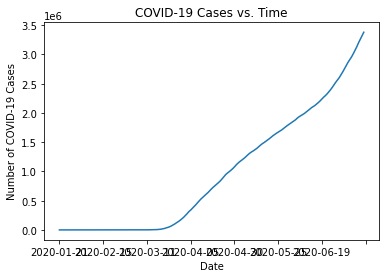

In [3]:
# Plot sum of all cases across all counties for each day over time.
covid.groupby('date')['cases'].sum().plot()
plt.title('COVID-19 Cases vs. Time')
plt.xlabel('Date')
plt.ylabel('Number of COVID-19 Cases')
plt.show()

Preprocess covid. 

In [4]:
# Remove rows for unknown counties. 
#covid = covid[covid.county != 'Unknown']

# Join county and state column because some counties share a name.
# State column is retained because it is useful for comparison.
covid['county'] = covid['county'].str.cat(covid['state'],sep=", ")
# Drop fips column because other datasets do not use it as an identifier. 
covid.drop(['fips'], axis=1, inplace=True)

# Add mortality rate column (mortality = deaths/cases).
covid['mortality'] = covid['deaths'].divide(covid['cases'])

covid

,date,county,state,cases,deaths,mortality
0,2020-01-21,"Snohomish, Washington",Washington,1,0,0.000000
1,2020-01-22,"Snohomish, Washington",Washington,1,0,0.000000
2,2020-01-23,"Snohomish, Washington",Washington,1,0,0.000000
3,2020-01-24,"Cook, Illinois",Illinois,1,0,0.000000
4,2020-01-24,"Snohomish, Washington",Washington,1,0,0.000000
...,...,...,...,...,...,...
331174,2020-07-13,"Sweetwater, Wyoming",Wyoming,150,0,0.000000
331175,2020-07-13,"Teton, Wyoming",Wyoming,162,1,0.006173
331176,2020-07-13,"Uinta, Wyoming",Wyoming,205,0,0.000000
331177,2020-07-13,"Washakie, Wyoming",Wyoming,42,5,0.119048


Use counties with the most cases.

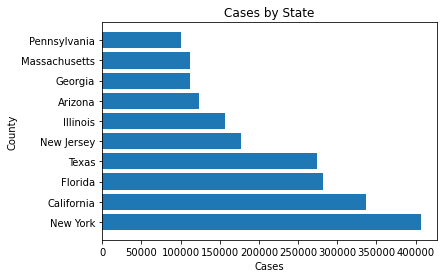

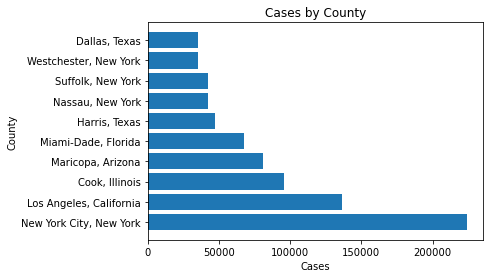

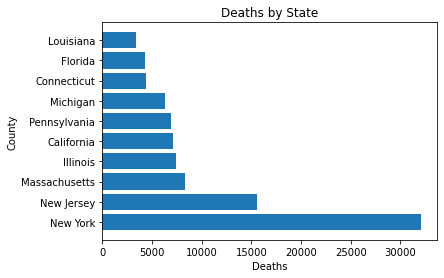

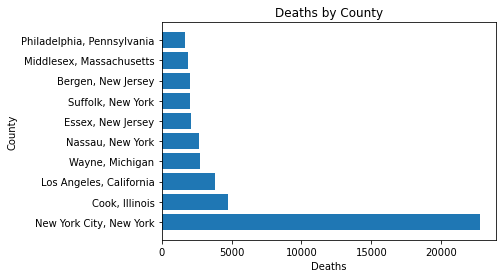

In [5]:
# Select the most current data. 
covid_current = covid.loc[covid['date'] == covid.date.max()]

# Creates top 10 bar chart by county.
def top_10_county(measure):
    # Get top 10 counties for chosen measure.
    bar_chart = covid_current.sort_values(by=measure, ascending=False)
    bar_chart = bar_chart.head(10)
    # Create bar chart.
    plt.barh(bar_chart['county'], bar_chart[measure])
    plt.title(measure.capitalize() + ' by County')
    plt.xlabel(measure.capitalize())
    plt.ylabel('County')
    plt.show()
    
# Creates top 10 bar chart by state.
def top_10_state(measure):    
    bar_chart = covid_current.groupby('state', as_index=False)[[measure]].sum()
    bar_chart = bar_chart.sort_values(by=measure, ascending=False)
    bar_chart = bar_chart.head(10)
    bar_chart.describe()
    # Create bar chart.
    plt.barh(bar_chart['state'], bar_chart[measure])
    plt.title(measure.capitalize() + ' by State')
    plt.xlabel(measure.capitalize())
    plt.ylabel('County')
    plt.show() 
    
# Top 10 cases and deaths for states and counties. 
top_10_state('cases')
top_10_county('cases')
top_10_state('deaths')
top_10_county('deaths')

COVID cases over time. 

In [6]:
# Plot number of COVID19 cases over time for the 10 counties with the most COVID19 cases.
for i in range(0,100):
    county = top_cases.county[i]
    # Select all rows from this county.
    county_data = covid.loc[covid['county'] == county]
    # Create line chart. 
    plt.plot(county_data['date'], county_data['cases'])
    plt.title(county)
    plt.xlabel('Date')
    date_ticks = [county_data['date'].min(), county_data['date'].max()]
    plt.xticks(date_ticks)
    plt.ylabel('Number of COVID19 Cases')
    plt.show()

NameError: name 'top_cases' is not defined

In [ ]:

top_mortality_rate = top_cases.sort_values(by='mortality', ascending=False)

head = top_mortality_rate.head(20)

In [ ]:
census = pd.read_excel('co-est2019-annres.xlsx')
census = census[['County', 2019]]
census.columns = ['County, State', 'Population']
census = census.dropna()

census[['County', 'State']] = census['County, State'].str.split(', ', expand=True)
census['County'] = census['County'].str.replace('.', '')
census['County'] = census['County'].str.replace(' County', '')
census = census[['County', 'State', 'Population']]


census.loc[census['County'].isin(head.county)]

In [7]:
# D.C., Guam, Northern Mariana Islands, Puerto Rico, Virign Islands account for 5 extras

cases = {}
groups = covid.groupby('state')
state_list = []
s_names = []
for state, g in groups:
    state_list.append(g)
    s_names.append(state)
    
for i, state in enumerate(state_list):
    total = state['cases'].sum()
    cases[s_names[i]] = total
    
simple_df = pd.DataFrame(list(cases.items()),columns = ['state','cases'])

simple_df.head()

,state,cases
0,Alabama,1909754
1,Alaska,63400
2,Arizona,3217685
3,Arkansas,934743
4,California,12044560


In [8]:
pop_list = pd.read_html("https://www.infoplease.com/us/states/state-population-by-rank")

pop_df = pop_list[0]
pop_df.columns = ['rank', 'state', 'pop', 'percent of total pop']
pop_df.head()

,rank,state,pop,percent of total pop
0,1.0,California,39512223,11.91%
1,2.0,Texas,28995881,8.74%
2,3.0,Florida,21477737,6.47%
3,4.0,New York,19453561,5.86%
4,5.0,Illinois,12671821,3.86%


In [11]:
covid_pop = pd.merge(left=pop_df, right=simple_df, left_on='state', right_on='state')
covid_pop = covid_pop.drop(columns=['percent of total pop'])
covid_pop.head()

,rank,state,pop,cases
0,1.0,California,39512223,12044560
1,2.0,Texas,28995881,7956640
2,3.0,Florida,21477737,7564805
3,4.0,New York,19453561,34540505
4,5.0,Illinois,12671821,9642113


Text(0, 0.5, 'number of cases')

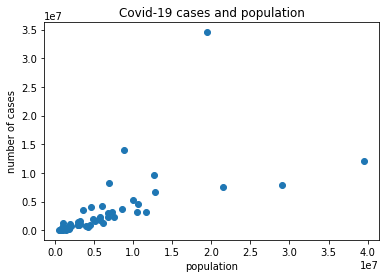

In [13]:
plt.scatter(covid_pop['pop'], covid_pop['cases'])
plt.title("Covid-19 cases and population")
plt.xlabel('population')
plt.ylabel('number of cases')

In [16]:
pop = covid_pop['pop'].values.reshape(-1,1)
cases = covid_pop['cases'].values.reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(pop, cases)
predicted = model.predict(pop)

Text(0, 0.5, 'number of cases')

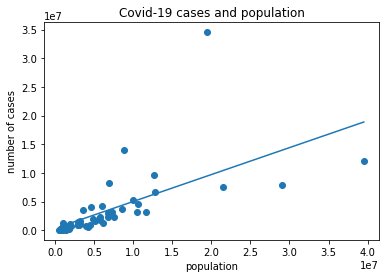

In [20]:
plt.plot(pop,predicted)
plt.scatter(pop, cases)
plt.title("Covid-19 cases and population")
plt.xlabel('population')
plt.ylabel('number of cases')